In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing the dataset
loan = pd.read_csv('loan_prediction.csv')

In [16]:
loan.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [17]:
loan.groupby('Loan_Amount_Term').count()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
Loan_Amount_Term,,,,,
0.0,14,14,14,14,14
12.0,1,1,1,1,1
36.0,2,2,2,2,2
60.0,2,2,2,2,2
84.0,4,4,4,4,4
120.0,3,3,3,3,3
180.0,44,44,44,44,44
240.0,4,4,4,4,4
300.0,13,13,13,13,13


In [18]:
loan.groupby('Loan_Status').count()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
0,192,192,192,192,192
1,422,422,422,422,422


In [20]:
loan.groupby('Credit_History').count()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
Credit_History,,,,,
0.0,139,139,139,139,139
1.0,475,475,475,475,475


In [21]:
loan.isnull().sum(axis=0)

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

In [5]:
X = loan.iloc[:, :5].values
y = loan.iloc[:, 5:].values

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier

In [9]:
#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier = DecisionTreeClassifier(criterion = 'entropy', 
                                    max_depth=5, 
                                    min_samples_split=107, 
                                    min_samples_leaf=10, 
                                    max_features=None,  
                                    max_leaf_nodes=4,
                                    random_state = 0)
 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=107, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [12]:
#######################################################################################
from sklearn.externals.six import StringIO  
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

In [13]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf('notepad_loan_tree.pdf')

True

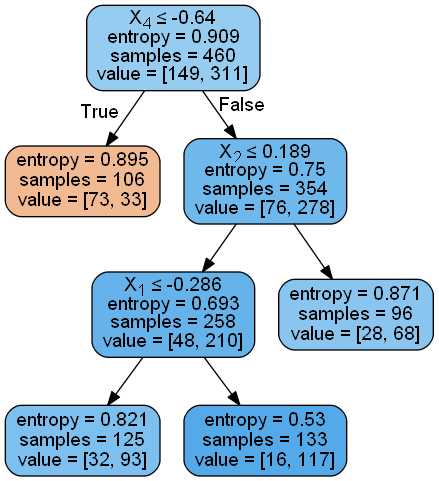

In [14]:
Image(graph.create_png())